# 부산

### 201892112 김윤경 , 201982116 설재환

### 개요
데이터 : 부산내 모 사립대학교, 지원자의 거주지 자료. 연도별 2016년, 2017년, 2019년

입학 학생들이 어디서 왔는지 from 정보를 지도상에 찍거나, 추이와 분포를 확인하고자 한다.

-> 실제 시행한 입학홍보 자료와 함께 비교분석을 한다면, 홍보비의 효율적인 투자를 위해 분석결과를 활용할 수 있을 것으로 예상됨.

### 계획
2016년, 2017년, 2019년 으로 총 3년간의 데이터.  
id별로 시계열은 아니고, 주소지 별로는 시계열로 볼 수 있음.  
성명삭제예정  
data1 : id, 출신학교, 주소  
data2 : id, 출신학교, 주소  
data3 : id, 학교명, 우편주소  

In [307]:
import pandas as pd;import numpy as np;import matplotlib.pyplot as plt;import folium;
plt.rc('font', family = 'Malgun Gothic') # matplotlib 한글 깨지는거 수정

data1 = pd.read_excel('./상대주소/phython-2016-data.xlsx')
data2 = pd.read_excel('./상대주소/phython-2017-data.xlsx')
data3 = pd.read_excel('./상대주소/phython-2019-data.xlsx')

# info 다 한다음에, 단일데이터 'data' 기준으로 템플릿 쭉 만들기
data1.info()
data1.head()

# drop
data1 = data1.drop(0, axis=0).drop(['순번','성명','출신학교'],axis=1)
data2 = data2.drop(0, axis=0).drop(['성명','출신학교'],axis=1)
data3 = data3.drop(0, axis=0).drop(['No.','학교명','성명'],axis=1)

# rename
data3 = data3.rename(columns={'우편주소' : '주소'})

# add
data1['2016'] = 1
data2['2017'] = 1
data3['2019'] = 1

'''
해야할 것
1. 지역별로 상위지역으로 변환 ex) 울산광역시 울주군 -> 울산광역시
2. id 데이터를 테이블화 ex) 2016년 경남:10명, 부산:20명, 서울:7명 / 2017년 경남 : x명, 부산:x명, 서울:x명 / 2019년 ...
3. 각 주소별로 위도,경도 테이블 만들고,
4. matplotlib 으로 추이 확인(지역별, 년도별), folium 으로 지역에 년도별 추이 그리기
'''

res1 = []
for line in data1['주소'] :
    for item in line.split(' ') :
        if(item.count('시') == 1) : res1.append(item); break # 시 우선, '시' 를 발견하면 break 하고 다음 line으로
        elif(item.count('군') == 1) : res1.append(item); continue # 울산광역시 울주군 -> 울산광역시
res2 = []
for line in data2['주소'] :
    for item in line.split(' ') :
        if(item.count('시') == 1) : res2.append(item); break # 시 우선, '시' 를 발견하면 break 하고 다음 line으로
        elif(item.count('군') == 1) : res2.append(item); continue # 울산광역시 울주군 -> 울산광역시
res3 = []
for line in data3['주소'] :
    for item in line.split(' ') :
        if(item.count('시') == 1) : res3.append(item); break # 시 우선, '시' 를 발견하면 break 하고 다음 line으로
        elif(item.count('군') == 1) : res3.append(item); continue # 울산광역시 울주군 -> 울산광역시
data1['시'] = res1
data2['시'] = res2
data3['시'] = res3

data1 = data1.drop('주소', axis=1)
data2 = data2.drop('주소', axis=1)
data3 = data3.drop('주소', axis=1)

data11 = data1.groupby('시').count().T
data22 = data2.groupby('시').count().T
data33 = data3.groupby('시').count().T

df1 = pd.merge(data11,data22, how='outer')
df2 = pd.merge(df1, data33, how='outer')
df2.index = ['2016','2017','2019']
df2.index.name = '년도'

df = df2 # 완결자료형태

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
순번      79 non-null float64
성명      79 non-null object
출신학교    79 non-null object
주소      79 non-null object
dtypes: float64(1), object(3)
memory usage: 2.6+ KB


시,거제시,구미시,김해시,부산광역시,양산시,울산광역시,창원시,통영시,포항시
년도,,,,,,,,,
2016,4,1,4,22,3,19,6,3,4
2017,2,3,4,17,6,8,7,4,4
2019,6,1,6,14,5,18,7,1,1


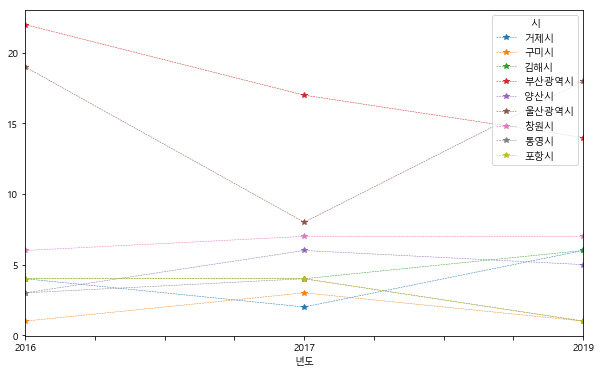

In [309]:
## matplot # 년도에 따른 주요도시(완결자료)별 추이 그래프
df3 = df.loc[:,(np.isnan(df).sum(axis=0)==0).tolist()]
df3.plot(figsize = (10,6), ls='--', lw=0.5, marker='*')
plt.show()

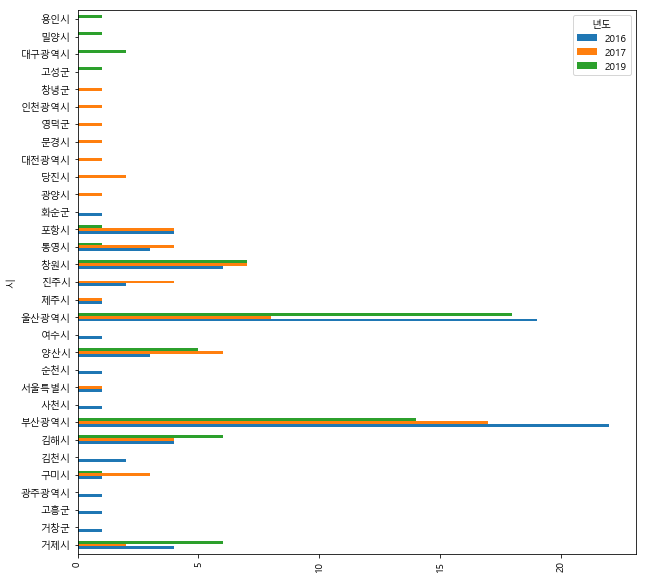

In [312]:
## matplot # 도시에 따라 년도별 증감그래프
df.T.plot(kind = 'barh', figsize = (10,10))
plt.xticks(rotation=90)
plt.show()

# df.to_excel('./상대주소/df.xlsx')

# 위도/경도 데이터 만들기. folium 스크립트 짜기.